# Survival Analysis Lab

Complete the following exercises to solidify your knowledge of survival analysis.

In [5]:
!pip install chart_studio
!pip install cufflinks
!pip install lifelines
import pandas as pd
import chart_studio.plotly as py
import cufflinks as cf
from lifelines import KaplanMeierFitter

cf.go_offline()



You should consider upgrading via the 'C:\Users\WM Miramontes\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\WM Miramontes\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\WM Miramontes\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Using legacy 'setup.py install' for autograd, since package 'wheel' is not installed.
Using legacy 'setup.py install' for autograd-gamma, since package 'wheel' is not installed.
Using legacy 'setup.py install' for future, since package 'wheel' is not installed.
    Running setup.py install for future: started
    Running setup.py install for future: finished with status 'done'
    Running setup.py install for autograd: started
    Running setup.py install for autograd: finished with status 'done'
    Running setup.py install for autograd-gamma: started
    Running setup.py install for autograd-gamma: finished with status 'done'


You should consider upgrading via the 'C:\Users\WM Miramontes\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [8]:
data = pd.read_csv(r'C:\Users\WM Miramontes\Documents\BootCamp\lab-survival-analysis\data\attrition.csv')

## 1. Generate and plot a survival function that shows how employee retention rates vary by gender and employee age.

*Tip: If your lines have gaps in them, you can fill them in by using the `fillna(method=ffill)` and the `fillna(method=bfill)` methods and then taking the average. We have provided you with a revised survival function below that you can use for the exercises in this lab*

In [9]:
def survival(data, group_field, time_field, event_field):
    kmf = KaplanMeierFitter()
    results = []

    for i in data[group_field].unique():
        group = data[data[group_field]==i]
        T = group[time_field]
        E = group[event_field]
        kmf.fit(T, E, label=str(i))
        results.append(kmf.survival_function_)

    survival = pd.concat(results, axis=1)
    front_fill = survival.fillna(method='ffill')
    back_fill = survival.fillna(method='bfill')
    smoothed = (front_fill + back_fill) / 2
    return smoothed

In [12]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [11]:
employee_age = survival(data, 'Gender', 'Age', 'Attrition')
employee_age


,Female,Male
timeline,,
0.0,1.000000,1.000000
18.0,0.998299,0.996599
19.0,0.994880,0.992058
20.0,0.988019,0.989786
21.0,0.979413,0.988645
22.0,0.975964,0.985201
23.0,0.975964,0.980564
24.0,0.969018,0.977050
25.0,0.969018,0.969918


In [16]:
employee_age.iplot(kind='line',xTitle='Edad',yTitle='Tasa de retención', 
                     title='Retention rate by age and gender')

## 2. Compare the plot above with one that plots employee retention rates by gender over the number of years the employee has been working for the company.

In [21]:
employee_age = survival(data, 'Gender', 'YearsAtCompany', 'Attrition')
employee_age.iplot(kind='line',xTitle='Years at company',yTitle='Rate', 
                     title='Retention Rate by Years at company and sex')

## 3. Let's look at retention rate by gender from a third perspective - the number of years since the employee's last promotion. Generate and plot a survival curve showing this.

In [22]:
employee_age = survival(data,'Gender','YearsSinceLastPromotion','Attrition')
employee_age.iplot(kind='line',xTitle='Years since last promotion',yTitle='Rate', 
                     title='Retention Rate by Years since last promotion and gender')

## 4. Let's switch to looking at retention rates from another demographic perspective: marital status. Generate and plot survival curves for the different marital statuses by number of years at the company.

<AxesSubplot:xlabel='timeline'>

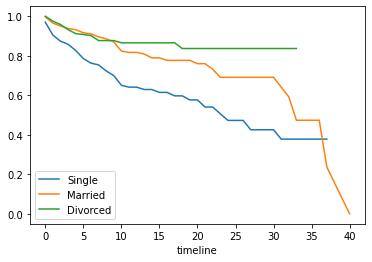

In [23]:
employee_age = survival(data, 'MaritalStatus', 'YearsAtCompany', 'Attrition')
employee_age.plot()


## 5. Let's also look at the marital status curves by employee age. Generate and plot the survival curves showing retention rates by marital status and age.

In [24]:
employee_age = survival(data,'MaritalStatus','Age','Attrition')
employee_age.iplot(kind='line',xTitle='Age',yTitle='Rate', 
                     title='Age, martial statuts and sex')

## 6. Now that we have looked at the retention rates by gender and marital status individually, let's look at them together. 

Create a new field in the data set that concatenates marital status and gender, and then generate and plot a survival curve that shows the retention by this new field over the age of the employee.

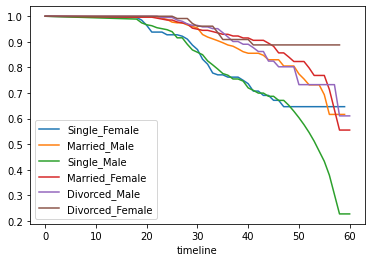

In [47]:
data['StatusGender'] = data['MaritalStatus'] + '_' + data['Gender']

employee_age = survival(data, 'StatusGender', 'Age', 'Attrition')
employee_age.plot();


## 6. Let's find out how job satisfaction affects retention rates. Generate and plot survival curves for each level of job satisfaction by number of years at the company.

In [25]:
employee_age = survival(data, 'JobSatisfaction', 'YearsAtCompany', 'Attrition')
employee_age.iplot(kind='line',xTitle='Age',yTitle='Rate', 
                     title='Age, martial statuts and sex')


## 7. Let's investigate whether the department the employee works in has an impact on how long they stay with the company. Generate and plot survival curves showing retention by department and years the employee has worked at the company.

In [26]:
employee_age = survival(data, 'Department', 'YearsAtCompany', 'Attrition')
employee_age.iplot(kind='line',xTitle='Age',yTitle='Rate', 
                     title='Age, martial statuts and sex')


## 8. From the previous example, it looks like the sales department has the highest attrition. Let's drill down on this and look at what the survival curves for specific job roles within that department look like.

Filter the data set for just the sales department and then generate and plot survival curves by job role and the number of years at the company.

In [29]:
employee_age = survival(data, 'JobRole', 'YearsAtCompany', 'Attrition')
employee_age.iplot(kind='line',xTitle='Age',yTitle='Rate', 
                     title='Age, martial statuts and gender')


## 9. Let examine how compensation affects attrition.

- Use the `pd.qcut` method to bin the HourlyRate field into 5 different pay grade categories (Very Low, Low, Moderate, High, and Very High).
- Generate and plot survival curves showing employee retention by pay grade and age.

In [34]:
data['HourlyRate']

0       94
1       61
2       92
3       56
4       40
        ..
1465    41
1466    42
1467    87
1468    63
1469    82
Name: HourlyRate, Length: 1470, dtype: int64

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   int64   
 2   BusinessTravel            1470 non-null   object  
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   object  
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   object  
 8   EmployeeCount             1470 non-null   int64   
 9   EmployeeNumber            1470 non-null   int64   
 10  EnvironmentSatisfaction   1470 non-null   int64   
 11  Gender                    1470 non-null   object  
 12  HourlyRate                1470 non-null   category
 13  JobInvolvement            1470 non-null   int64 

In [44]:
data['hourly_paygrade'] = pd.cut(data['HourlyRate'], 5, labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High'])

TypeError: Categorical.min() takes 1 positional argument but 2 were given

In [46]:
employee_age = survival(data, 'hourly_paygrade', 'Age', 'Attrition')
employee_age.iplot(kind='line',xTitle='Age',yTitle='Rate', 
                     title='Age, martial statuts and gender')

## 10. Finally, let's take a look at how the demands of the job impact employee attrition.

- Create a new field whose values are 'Overtime' or 'Regular Hours' depending on whether there is a Yes or a No in the OverTime field.
- Create a new field that concatenates that field with the BusinessTravel field.
- Generate and plot survival curves showing employee retention based on these conditions and employee age.

In [48]:
data['OverTime field'] = data['OverTime']
data['OverTime field'] = data['OverTime field'].str.replace('Yes', 'Overtime / ')
data['OverTime field'] = data['OverTime field'].str.replace('No', 'Regular Hours / ')
data['New Field'] = data['OverTime field'] + data['BusinessTravel']
data['New Field']


0                Overtime / Travel_Rarely
1       Regular Hours / Travel_Frequently
2                Overtime / Travel_Rarely
3            Overtime / Travel_Frequently
4           Regular Hours / Travel_Rarely
                      ...                
1465    Regular Hours / Travel_Frequently
1466        Regular Hours / Travel_Rarely
1467             Overtime / Travel_Rarely
1468    Regular Hours / Travel_Frequently
1469        Regular Hours / Travel_Rarely
Name: New Field, Length: 1470, dtype: object

<AxesSubplot:xlabel='timeline'>

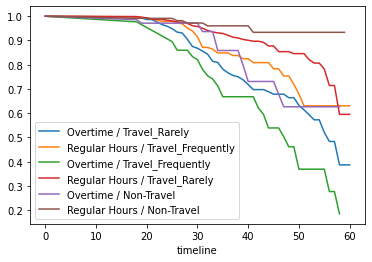

In [49]:
employee_age = survival(data, 'New Field', 'Age', 'Attrition')
employee_age.plot()
